In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '../data/raw/dataset.csv'  
df = pd.read_csv(data_path)

print("Shape of dataset:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())

Shape of dataset: (6362620, 11)

Columns in dataset: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [2]:
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
display(df.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
print("\nMissing values:\n", df.isnull().sum())
print("\nClass Distribution:")
print(df['isFraud'].value_counts())


Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Class Distribution:
0    6354407
1       8213
Name: isFraud, dtype: int64


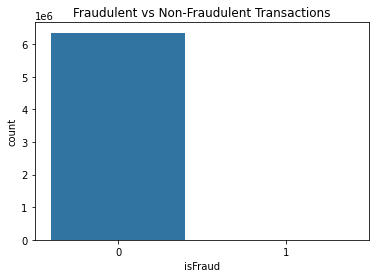

In [5]:
sns.countplot(x='isFraud', data=df)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [6]:
print("\nTransaction types and their counts:")
print(df['type'].value_counts())


Transaction types and their counts:
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [7]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print("\nFraud rate by transaction type (%):")
print((fraud_by_type * 100).round(2))


Fraud rate by transaction type (%):
type
TRANSFER    0.77
CASH_OUT    0.18
CASH_IN     0.00
DEBIT       0.00
PAYMENT     0.00
Name: isFraud, dtype: float64


Most frauds happen in TRANSFER and CASH_OUT types.
(PAYMENT, DEBIT, CASH_IN are almost always safe.)

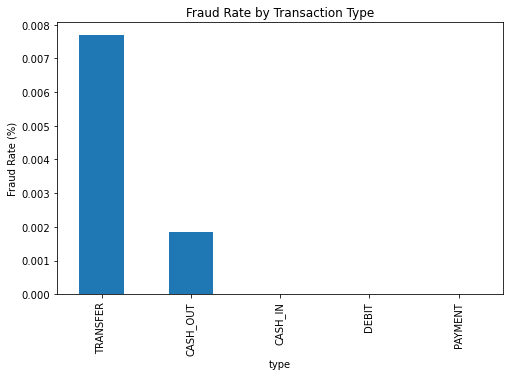

In [8]:
fraud_by_type.plot(kind='bar', figsize=(8,5))
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.show()

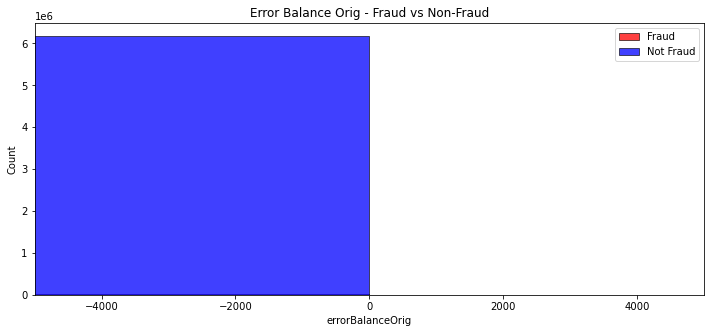

In [9]:
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

plt.figure(figsize=(12,5))
sns.histplot(df[df['isFraud'] == 1]['errorBalanceOrig'], bins=100, color='red', label='Fraud')
sns.histplot(df[df['isFraud'] == 0]['errorBalanceOrig'], bins=100, color='blue', label='Not Fraud')
plt.legend()
plt.title('Error Balance Orig - Fraud vs Non-Fraud')
plt.xlim(-5000,5000)
plt.show()